In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66311_U')

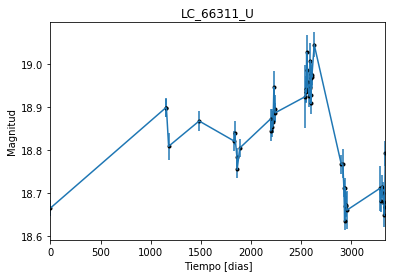

In [2]:
data = np.genfromtxt('LC_66311_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66311_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

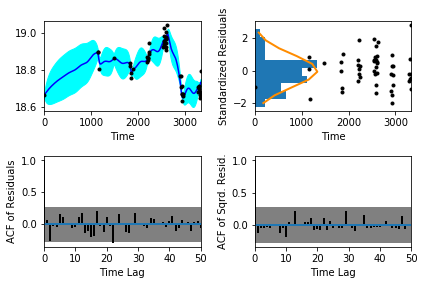

In [5]:
sample.assess_fit()

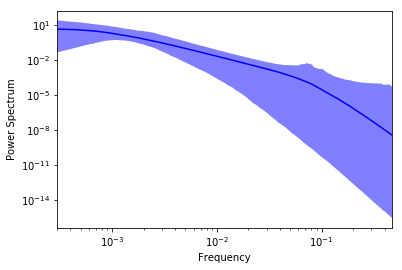

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66311_U')

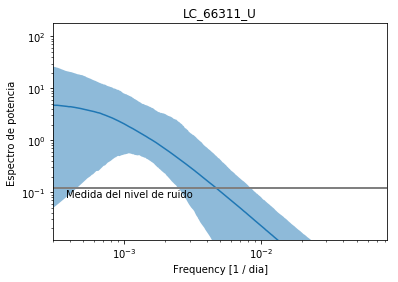

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66311_U')

Text(0.5,1,'Prediccion , valor esperado LC_66311_U')

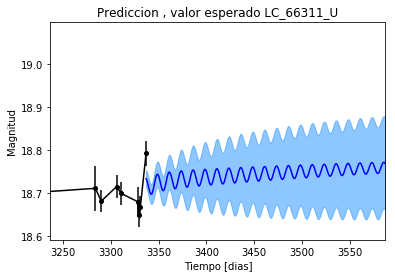

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66311_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66311_U')

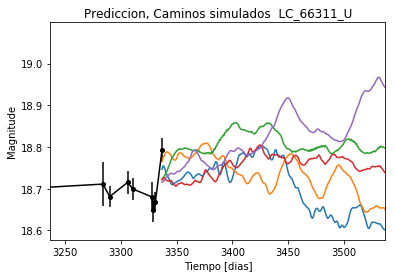

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66311_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66311_U')

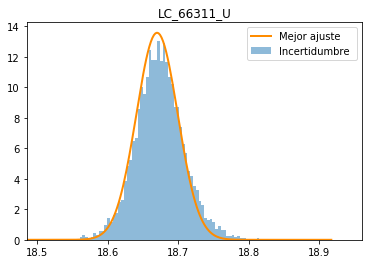

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66311_U')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_U')

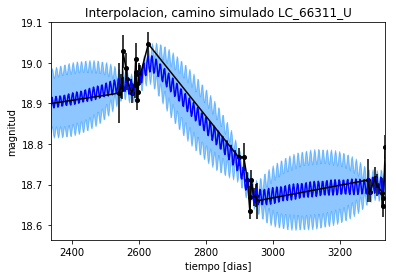

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_U')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_U')

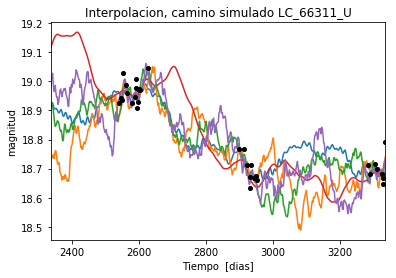

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 652.867453496
Median: 0.0278738268811
Standard deviation: 0.20084934901
68% credibility interval: [ 0.00260537  0.25431541]
95% credibility interval: [  4.21739016e-04   7.54659755e-01]
99% credibility interval: [  3.27478047e-04   9.08021652e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 316.263037512
Median: 0.00801238861306
Standard deviation: 0.107277209929
68% credibility interval: [ 0.00063075  0.079414  ]
95% credibility interval: [  3.30703927e-04   3.74956809e-01]
99% credibility interval: [  3.04381602e-04   6.94992519e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 208.324664406
Median: 0.0386418726918
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1126.43903584
Median: 100.546046277
Standard deviation: 1.86716853781
68% credibility interval: [  98.50452514  102.09899427]
95% credibility interval: [  96.12803541  103.36414529]
99% credibility interval: [  94.26541615  103.70967958]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 426.230487968
Median: 1.10583809538
Standard deviation: 2.26670534395
68% credibility interval: [ 0.1470985   4.36194062]
95% credibility interval: [ 0.02625164  8.04517302]
99% credibility interval: [ 0.01300863  9.9339094 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 480.91493364
Median: 1.1185624071
Standard deviation: 8.76425678792
68% credibility interval: [  0.10002448  12.55860469]
95% credibility interval: [  3.15432856e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1308.54497619
Median: 3.64472801225e-25
Standard deviation: 9.12355720294e+62
68% credibility interval: [  1.05782489e-60   2.32287716e+32]
95% credibility interval: [  9.25225294e-85   4.92400053e+55]
99% credibility interval: [  2.26684837e-136   6.81913848e+059]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2277.44971823
Median: 18.8123439305
Standard deviation: 0.0568124444536
68% credibility interval: [ 18.76080661  18.85613901]
95% credibility interval: [ 18.68112994  18.91474437]
99% credibility interval: [ 18.60997891  18.96742214]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 265.223784067
Median: 0.0712079738697
Standard deviation: 0.242886229627
68% credibility interval: [ 0.          0.44254275]
95% credibility interval: [ 0.          0.84147446]
99% credibility interval: [ 0.          0.92471863]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 265.223784067
Median: 0.0712079738697
Standard deviation: 0.242886229627
68% credibility interval: [ 0.          0.44254275]
95% credibility interval: [ 0.          0.84147446]
99% credibility interval: [ 0.          0.92471863]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 592.320880237
Median: 0.0
Standard deviation: 0.000545416661257
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1126.43903584
Median: 100.546046277
Standard deviation: 1.86716853781
68% credibility interval: [  98.50452514  102.09899427]
95% credibility interval: [  96.12803541  103.36414529]
99% credibility interval: [  94.26541615  103.70967958]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1566.32833522
Median: 0.0139054331727
Standard deviation: 0.0143332777548
68% credibility interval: [ 0.00843474  0.02459788]
95% credibility interval: [ 0.00577595  0.05073214]
99% credibility interval: [ 0.00475799  0.08801491]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1018.05711697
Median: 1.07534232084
Standard deviation: 0.206716658532
68% credibility interval: [ 0.88759399  1.29532549]
95% credibility interval: [ 0.74365486  1.55073172]
99% credibility interval: [ 0.6739211   1.74466647]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 812.848225021
Median: 0.000358662272349
Standard deviation: 0.0935011135505
68% credibility interval: [  3.04005358e-34   2.10229278e-02]
95% credibility interval: [  1.64879226e-57   2.42057056e-01]
99% credibility interval: [  3.79782032e-64   6.93724186e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 652.867453496
Median: (-0.175136419514-0.571423407524j)
Standard deviation: 1.98029197373
68% credibility interval: [-1.59791088+0.j         -0.01637003-3.63727075j]
95% credibility interval: [ -4.74166708e+00+0.j          -2.64986439e-03-0.00200778j]
99% credibility interval: [ -5.70526830e+00+0.j          -2.05760525e-03-0.37718609j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 316.263037512
Median: (-0.050343322409+0.667726517709j)
Standard deviation: 1.66832615147
68% credibility interval: [-0.49897285+2.90731424j -0.00396310+0.j        ]
95% credibility interval: [ -2.35592311e+00+3.18868099j  -2.07787406e-03+0.j        ]
99% credibility interval: [ -4.36676678e+00+3.64114084j  -1.91248601e-03+0.j        ]
Post